---

# Introduction

In this homework you will:

* Recall your skills of data analysis and preprocessing.
* Explore the behaviour of different machine learning models.
* Try to solve a regression type problem and interpret the results.

But first of all, a few notes:

* Check the first homework for a quick reminder on general rules.
* We do not expect you to make a model that makes necessarly good predictions, rather than explain why do you get the results which you get.
* We reserve the right to lower the grade for messy code, so keep it clean and make comments about what you do!
* Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

This time, you will do the coding part yourself. That means, you take decisions about EDA, data cleaning, hyperparameters choice, etc. on your own (for the most part, at least).

Enjoy it while I rest!  \ (•◡•) /

Another important mention: your work must be reproducible.
It means that it would be possible to run your code and obtain the same results by pressing "Run All" button in settings of this notebook. To do so, don't forget to fix the random seed number where possible!

# Dataset

Today your task will be to understand the relationship between the cholesterol level and its associated factors, such as gender, age, BMI, medical condition and some genomic features. This can be explored by a regression analysis using machine learning methods that we learned in the class.

Description of the variables:

* DM: diabetes mellitus: 0 = no diabetes, 1 = diabetes
* age: Age in years
* chol: Serum total cholesterol, mg/dl
* BMI: Body-mass index, kg/m2
* TG: Serum triglycerides, mg/dl
* APOE: Apolipoprotein E genotype, with six genotypes coded 1-6: 1 = e2/e2, 2 = e2/e3, 3 = e2/e4, 4 = e3/e3, 5 = e3/e4, 6 = e4/e4
* rs174548: Candidate SNP 1 genotype, chromosome 11, physical position 61,803,876
. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* rs4775041: Candidate SNP 2 genotype, chromosome 15, physical position 58,382,496. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* HTN: diagnosed hypertension: 0 = no, 1 = yes
* chd: diagnosis of coronary heart disease: 0 = no, 1 = yes

Target variable: Serum total cholesterol

# Tasks [8.0]

### Exploratory Data Analysis [2.5]

[0.1] Before the analysis itself, don't forget to check the features you are working with. Some of them are not very obvious. Google some information on what those features represent, and write it down here:

* TG - Serum triglycerides, mg/dl
* APOE - Apolipoprotein E genotype, with six genotypes coded 1-6: 1 = e2/e2, 2 = e2/e3, 3 = e2/e4, 4 = e3/e3, 5 = e3/e4, 6 = e4/e4
* rs174548 -  Candidate SNP 1 genotype, chromosome 11, physical position 61,803,876 . Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* rs4775041 - Candidate SNP 2 genotype, chromosome 15, physical position 58,382,496. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.

You can (and should!) use this information when interpreting results.

Download the data:

In [ ]:
!gdown 1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP

Downloading...
From: https://drive.google.com/uc?id=1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP
To: /content/Data-Cholesterol-V2.csv
100% 11.4k/11.4k [00:00<00:00, 26.6MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# для начала скачаем данные
df = pd.read_csv('Data-Cholesterol-V2.csv')
# посмотрим на них
df.tail(10)

,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
390,0,64,204,28.9,237,4,1,2,0,1
391,1,79,178,27.9,277,2,0,0,1,1
392,1,62,196,29.0,287,4,1,0,1,0
393,1,46,179,27.1,77,4,1,0,1,0
394,1,79,161,27.2,257,4,1,0,1,0
395,0,71,169,25.8,322,4,0,0,1,0
396,0,57,173,NaN,205,4,0,0,0,0
397,1,33,180,20.6,56,4,0,1,1,0
398,1,78,212,24.0,273,4,1,0,1,0
399,0,43,220,21.4,91,5,0,1,1,1


In [ ]:
# посмотрим на типы колонок
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DM         400 non-null    int64  
 1   age        400 non-null    int64  
 2   chol       400 non-null    int64  
 3   BMI        363 non-null    float64
 4   TG         400 non-null    int64  
 5   APOE       400 non-null    int64  
 6   rs174548   400 non-null    int64  
 7   rs4775041  400 non-null    int64  
 8   HTN        400 non-null    int64  
 9   chd        400 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 31.4 KB


Ага, несмотря на то, что ни одна из колонок не имеет тип "object", из описания становится понятно, что столбцы 'DM', 'APOE', 'rs174548', 'rs4775041', 'HTN' и 'chd' имеют очень ограниченный диапазон значений (в некоторых вовсе только 0 и 1) и для ускорения работы, могут быть переведены в категориальный тип данных.

In [ ]:
# Проверка на наллы
df.isna().sum()

DM            0
age           0
chol          0
BMI          37
TG            0
APOE          0
rs174548      0
rs4775041     0
HTN           0
chd           0
dtype: int64

In [ ]:
# Очень жаль, наллы все-таки есть, ну ничего, придется что-то с ними делать
# В датафрейме всего 400 записей, выкинув наллы, находящиеся всего в одной
# колонке, мы потереям 37 записей, что составляет почти 10%, поэтому заменим их
# на среднее значение по колонке
df.loc[df['BMI'].isna(), 'BMI'] = df['BMI'].mean()
# проверим, остались ли наны
df.isna().sum()
#

DM           0
age          0
chol         0
BMI          0
TG           0
APOE         0
rs174548     0
rs4775041    0
HTN          0
chd          0
dtype: int64

In [ ]:
# Ну вот теперь заменим тип описанных колонок на категориальный
# Для будущего удобства, создадим список имен категориальных и числовых колонок
category_lst = ['DM', 'APOE', 'rs174548', 'rs4775041', 'HTN', 'chd']
num_lst = ['age', 'chol', 'BMI', 'TG']
for col in category_lst:
  df[col] = df[col].astype('category')
# проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   DM         400 non-null    category
 1   age        400 non-null    int64   
 2   chol       400 non-null    int64   
 3   BMI        400 non-null    float64 
 4   TG         400 non-null    int64   
 5   APOE       400 non-null    category
 6   rs174548   400 non-null    category
 7   rs4775041  400 non-null    category
 8   HTN        400 non-null    category
 9   chd        400 non-null    category
dtypes: category(6), float64(1), int64(3)
memory usage: 15.8 KB


In [ ]:
# Хорошо, но моделям (кроме catboost) не удобно обращаться с категориальными
# признаками, так что давайте воспользуемся one-hot-encoding
ddf = pd.get_dummies(df, columns = category_lst, drop_first = True)
# сделали drop_first, чтобы избавиться от мультиколлинеарности
ddf

,age,chol,BMI,TG,DM_1,APOE_2,APOE_3,APOE_4,APOE_5,APOE_6,rs174548_1,rs174548_2,rs4775041_1,rs4775041_2,HTN_1,chd_1
0,74,215,26.200000,367,1,0,0,1,0,0,1,0,0,1,1,1
1,51,204,24.700000,150,1,0,0,1,0,0,0,1,1,0,1,1
2,64,205,24.200000,213,0,0,0,1,0,0,0,0,1,0,1,0
3,34,182,23.800000,111,0,1,0,0,0,0,1,0,1,0,1,0
4,52,175,34.100000,328,1,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,71,169,25.800000,322,0,0,0,1,0,0,0,0,0,0,1,0
396,57,173,24.954821,205,0,0,0,1,0,0,0,0,0,0,0,0
397,33,180,20.600000,56,1,0,0,1,0,0,0,0,1,0,1,0
398,78,212,24.000000,273,1,0,0,1,0,0,1,0,0,0,1,0


[0.5] Know your data, make relevant data analysis and explain:
 * What types of variables there are
 * Your strategy about NaN values, if any present
 * Your strategy about categorical columns, if any present

Итак, просуммируем:

- Посмотрели на данные, посмотрели тип колонок, количество Null в каждом столбце.

- Решили заменить Null средним значением

- Для некоторых колонок установили категориальный тип данных и применили к ним one-hot-encoding.


Assuming your data is now certainly clean, you can start looking at the features.

[0.5] Make relevant visualization of features(histograms, boxplots, etc.) and analyze it.

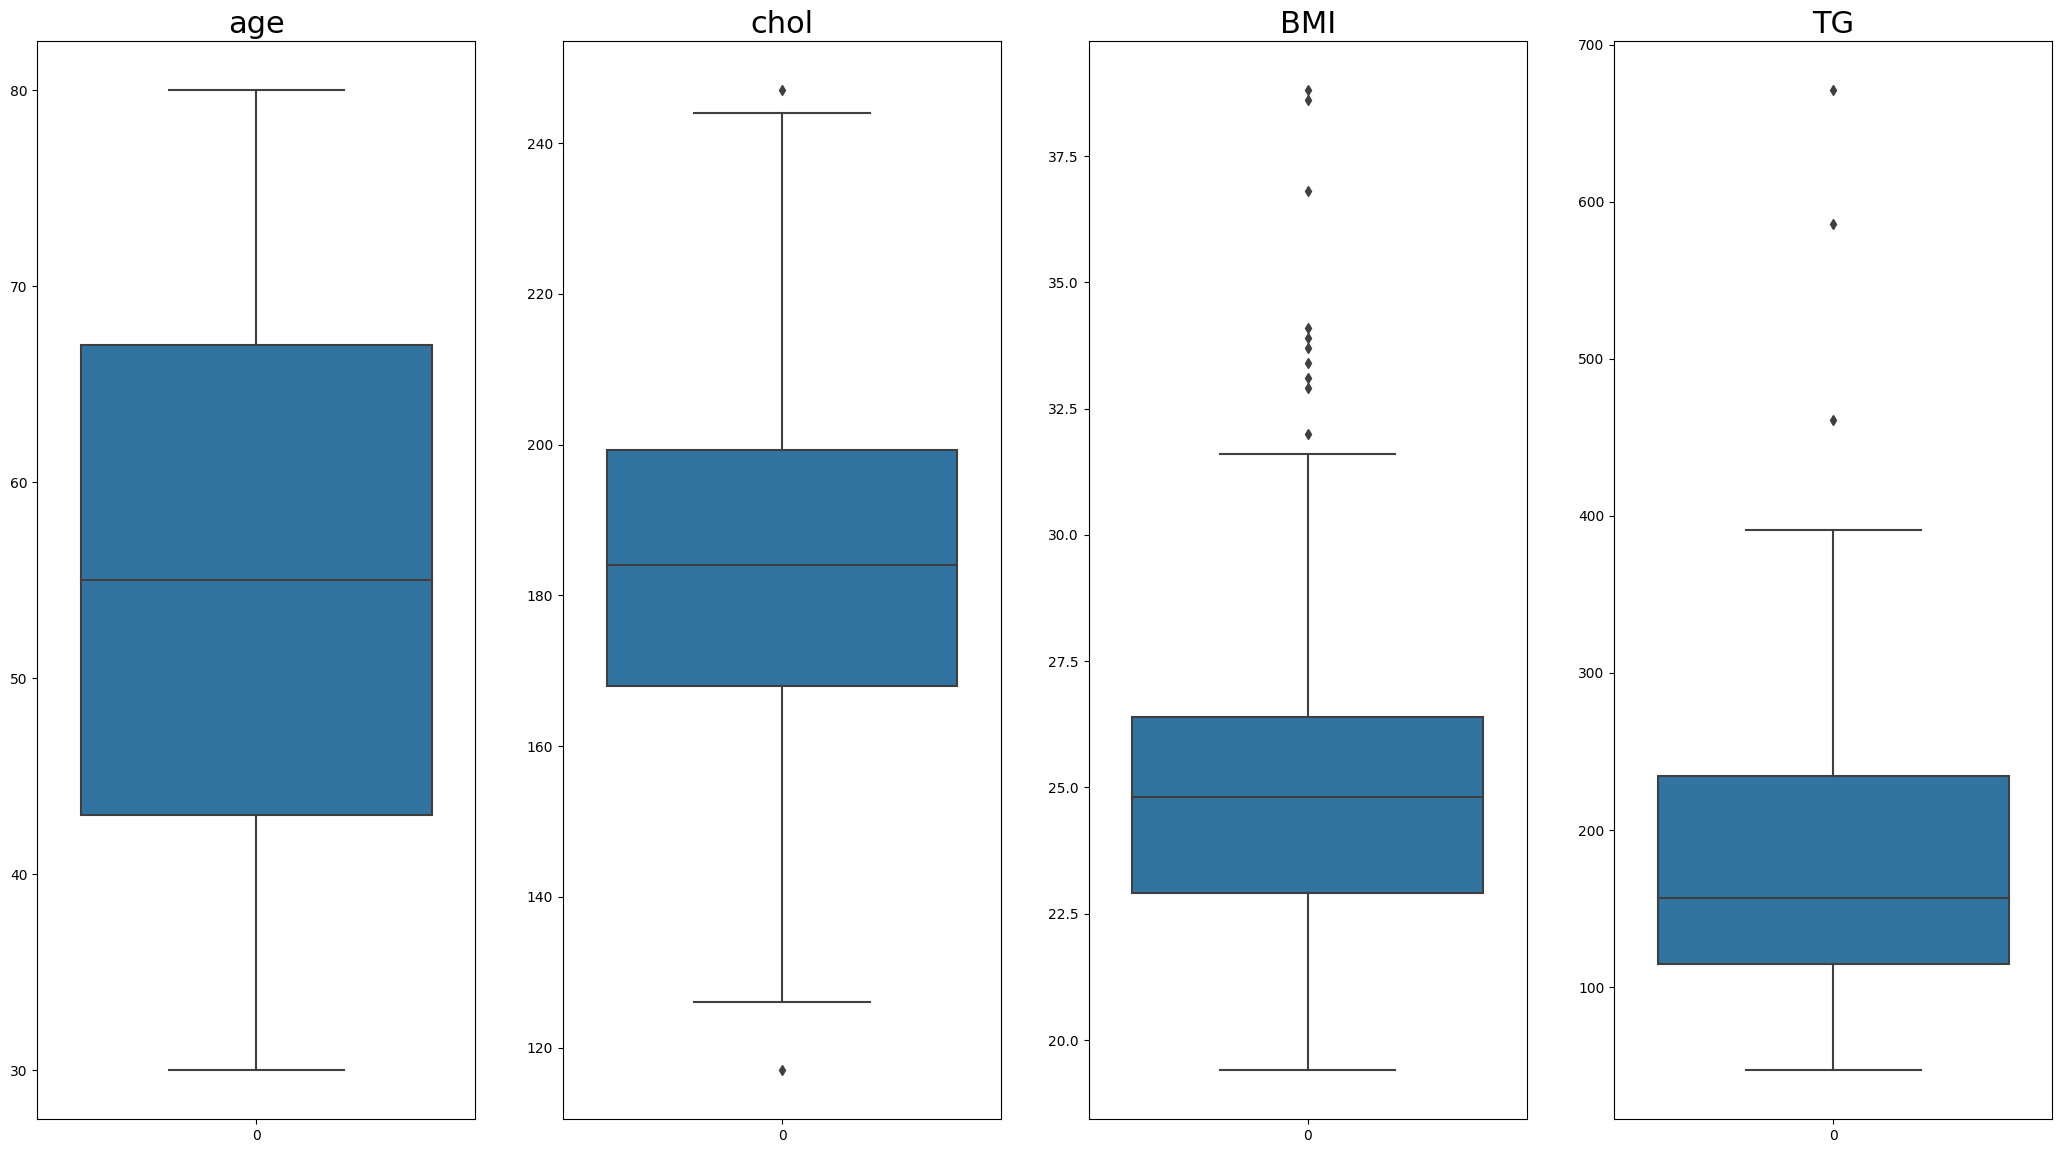

In [ ]:
# Давайте посмотрим на графики нашех признаков (числовых)
# Начнем с boxplot
import seaborn as sns
import matplotlib.pyplot as plt
# разделим на несколько сабплотов
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (26, 14))
axes = axes.ravel() # сделаем нормальную форму у axes
# проверим не ошиблись ли с размером сабплотов
assert len(num_lst) == len(axes)

for col, ax in zip(num_lst, axes):
  sns.boxplot(ddf[col], ax = ax) # бохплоты
  ax.set_title(col, fontsize = 22) # названия

По ним сразу можно наблюдать, что в признаке, отвечающем за индекс массы тела много выбросов, а в признаке количества сыворочного триглицерида в крови есть пару очень ярко выраженных выброса

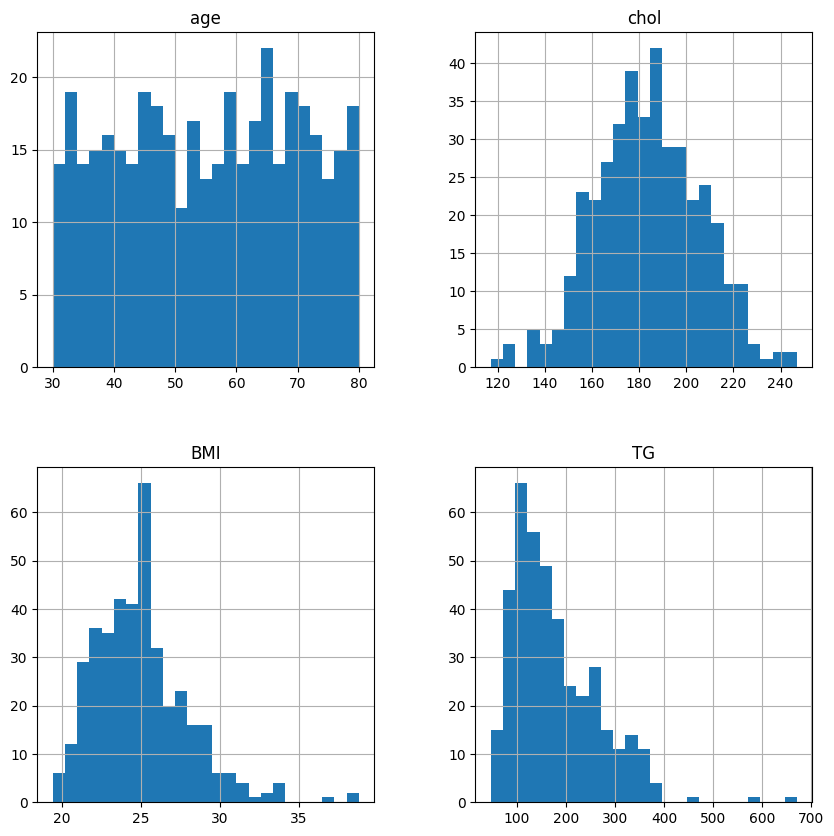

In [ ]:
# дальше - гистограммы
_ = ddf[num_lst].hist(figsize = (10,10), bins = 25)

Гистограммы нам дали понимание (примерное конечно) о распределениях наших числовых признаков: возраст, конечно, далек от нормального и ближе к равномерному, количество холестерина в крови похож на нормальный, а у двух оставшихся явная скошенность (skew).

[0.5] Is there anything strange about any of the features? If yes, what can be done?

Ну, собственно, все проблемы мы выяснили, осталось дело за малым - разобраться что с ними делать.

- В целом, что у BMI, что у TG, выбросы как таковые выбросами не являюся, так как люди, наверняка, бывают и с таким индексом массы тела и с такими анализами, однако как обрабатывать такие значения - вопрос посложнее, поэтому отнесемся к ним как к обычным выбросам, и выкинем значения, лежащие в высоком процентиле.
- Скошенность BMI и TG решается логарифмированием значений, причем особо хуже не станет, если мы отлогарифмируем все признаки.
- Так же стоит отнормализовать все признаки

До последних двух манипуляций стоит разбить выборку на треин и тест, чтобы при нормализации среднее значение и дисперсия тестовой выборки не влияло на обучение. Но по пайплайну это делается ниже, поэтому и две эти трансформации данных мы сделаем в следующей главе.

In [ ]:
# Выбросим выбросы
print(f"Records before: {len(df)}") # cколько было в начале
low, high = 0.01, 0.99 # берем такие процентили

quantiles = ddf[num_lst].quantile([low, high])
for col in num_lst:
  ddf = ddf[(ddf[col] >= quantiles[col][0.01])
  & (ddf[col] <= quantiles[col][0.99])]
print(f"Records before: {len(ddf)}")
ddf

Records before: 400
Records before: 370


,age,chol,BMI,TG,DM_1,APOE_2,APOE_3,APOE_4,APOE_5,APOE_6,rs174548_1,rs174548_2,rs4775041_1,rs4775041_2,HTN_1,chd_1
0,74,215,26.200000,367,1,0,0,1,0,0,1,0,0,1,1,1
1,51,204,24.700000,150,1,0,0,1,0,0,0,1,1,0,1,1
2,64,205,24.200000,213,0,0,0,1,0,0,0,0,1,0,1,0
3,34,182,23.800000,111,0,1,0,0,0,0,1,0,1,0,1,0
6,79,159,22.900000,274,0,1,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,79,161,27.200000,257,1,0,0,1,0,0,1,0,0,0,1,0
395,71,169,25.800000,322,0,0,0,1,0,0,0,0,0,0,1,0
396,57,173,24.954821,205,0,0,0,1,0,0,0,0,0,0,0,0
398,78,212,24.000000,273,1,0,0,1,0,0,1,0,0,0,1,0


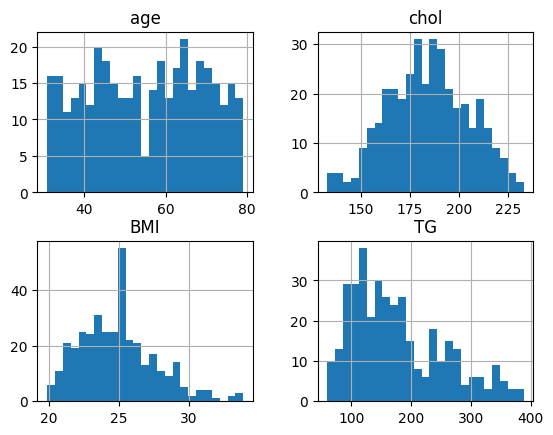

In [ ]:
# Построим теперь гистограммы
_ = ddf[num_lst].hist(bins = 25)

Можно видеть, что у TG мы исключили выбросы, у BMI же особо ничего не изменилось, предлагаю оставить всё как есть и отстать от выбросов

[0.75] Explore the relationship of features and interpret it if possible.

Text(0.5, 1.0, 'Spearman correlation')

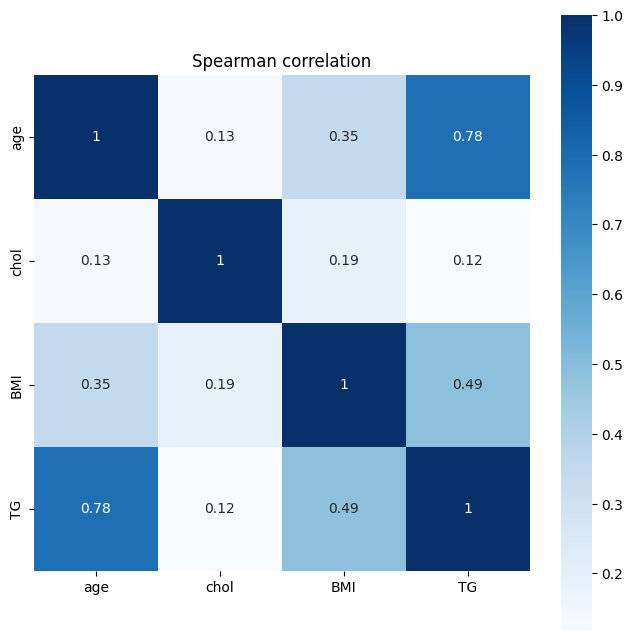

In [ ]:
# Пришло время корреляции
corr = ddf[num_lst].corr(method = 'spearman')

plt.figure(figsize = (8,8))
sns.heatmap(corr, square = True, annot = True, cmap = 'Blues')
plt.title('Spearman correlation')

Между какой-либо парой признаков нет такой высокой корреляции, чтобы нам стоило задуматься об избавлении от какого-либо признака (мультиколлинеарность часто ухудшает качество модели). Можно наблюдать высокий коэффициент корреляции между TG и age, наверно это действительно имеет место быть, однако я не медик, чтобы точно судить.

[0.15] Answer the following questions:

* Why can't categorical attributes be encoded with natural numbers?
* Would fields like 'id' cause the model (not necessarily linear) to overfit? Why?

Ответ:

- Категориальные признаки подразумевают то, что между ними не установлено определенного порядка, поэтому если мы просто отранжируем их натуральными цифрами, то внесем порядок, которого нет, а в линейной регрессии при одинаковых весах большие после ранжирования значения будут иметь больший вклад, а если кодировать какое-то значение нулем, то он и вовсе вклад не внесет.

- Вряд ли признак "айди" приведет к переобучению модели, так как переобучение, всё-таки обычно возникает из-за неправильно подобранных гиперпараметров, скорее данный признак ухудшит качество модели по описанным ранее причинам.

### Machine Learning [5.5]

[0.35] Split the data into train/test subsets and choose your target performance measure. Explain your choice.

In [ ]:
# Разделим на трейн и тест
from sklearn.model_selection import train_test_split

# Выделяем таргетную переменную и делаем из нее массив
Y = ddf['chol']
# Виртуозно выделяем признаки и делаем из них массив
X = ddf[ddf.columns[ddf.columns != 'chol']]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state = 42)

[0.15] Answer the following questions:

* Why do we need to scale the feature matrix before training machine learning models?
* Why do you think we don't produce scaling of One Hot encoded features?

Ответ:

- Масштабируем признаки до обучения по той причине, что на нескошенных данных модель покажет лучше качество, а благодаря standart scaller мы добьемся того, что масштаб признаков будет одинаковым и коэффициенты (в линейной регрессии) будут иметь один порядок при одинаковом вкладе признаков, благодаря чему модель более интерпретируема и можно проводить регуляризацию.

- Проводить масштабирование над dummies features бессмысленно, так как они и так нормализованы на 0 и 1

[0.35] Apply transformation to data, if needed. Justify your choice.

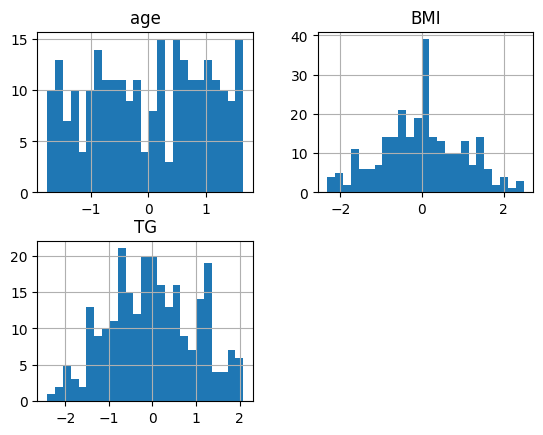

In [ ]:
from sklearn.preprocessing import PowerTransformer

# выделим числовые не таргетные признаки
num_lst = [x for x in num_lst if x != 'chol']
# отлогарифмируем их и отмасштабируем (PowerTransformer сразу делает standart scale)
pt = PowerTransformer().fit(X_train[num_lst])
X_train[num_lst] = pt.transform(X_train[num_lst])
X_test[num_lst] = pt.transform(X_test[num_lst])

# посмотрим что стало с распределениями
_ = X_train[num_lst].hist(bins = 25)

Стало получше

[0.25] Train a simple linear regression model, and rank it using test set. How well the model is doing?

In [ ]:
# Дошли до обучения, начнем с линейной регрессии
from sklearn.linear_model import LinearRegression

# Обучим на трейновых данных
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Воспользуемся метриками
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


for name, x, y in ('train', X_train, Y_train), ('test', X_test, Y_test):
  y_pred = lr.predict(x)
  r2 = r2_score(y, y_pred)
  mse = mean_squared_error(y, y_pred)
  print(f'{name}: r2 = {r2}, mse = {mse}')

train: r2 = 0.35814843766272764, mse = 269.3949398024353
test: r2 = 0.3034225686788079, mse = 308.1675290757899


R^2 в лучшее случае 1, если оценивать данные константой, то R^2 даст 0. В целом, можно сказать, что неплохо


[0.1] Answer the following question:

* From a simple linear regression model point of view, are the largest weights always the most important ones?

Если признаки отмасштабированы, то, скорее всего, чем выше коэффициент тем важнее признак.

[0.25] Obtain weights of the linear regression equation for this model and interpret them.

In [ ]:
# Давайте посмотрим на веса
print(X_train.columns)
print(lr.coef_)
print(lr.intercept_)

Index(['age', 'BMI', 'TG', 'DM_1', 'APOE_2', 'APOE_3', 'APOE_4', 'APOE_5',
       'APOE_6', 'rs174548_1', 'rs174548_2', 'rs4775041_1', 'rs4775041_2',
       'HTN_1', 'chd_1'],
      dtype='object')
[ 0.65054891  2.01417626  0.58402409  8.17745572 -4.67702652  6.24767728
  8.67216448 19.82434386 16.20514149  7.77706608  2.79085828  2.3459469
 -2.32800541 -0.58998132 13.00742287]
163.38545208771882


 Как мы можем видеть, из числовых признаков на наш уровень холестерина больше всего влияет индекс массы тела, причем зависимость прямопропорциональная, что звучит правдиво. Так же, у людей с диабетом наблюдается уровень холестерина повыше, но коэффициент небольшой. Остальные категориальные признаки плохо интерпретируемы

[0.25] What are residuals? Make a residuals vs predictions plot below. What do you observe?

Text(0, 0.5, 'Y_pred - Y')

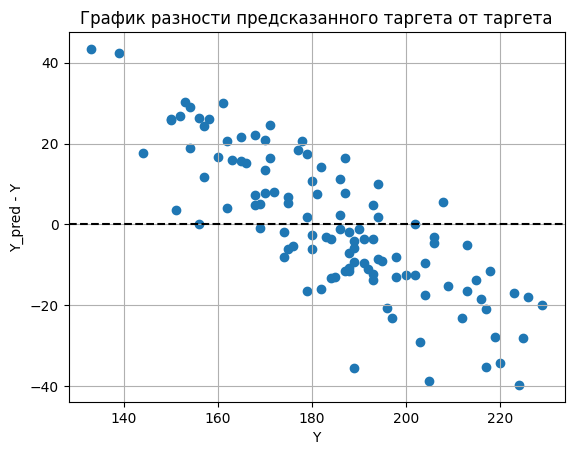

In [ ]:
# Сделаем предсказание на тестовых данных
Y_pred = lr.predict(X_test)
# Для наглядности построим график таргета от предсказанного таргета
plt.scatter(Y_test.values, Y_pred - Y_test.values )
plt.axhline(y=0, linestyle='--', color = 'black')
plt.grid()
plt.title('График разности предсказанного таргета от таргета')
plt.xlabel('Y')
plt.ylabel('Y_pred - Y')

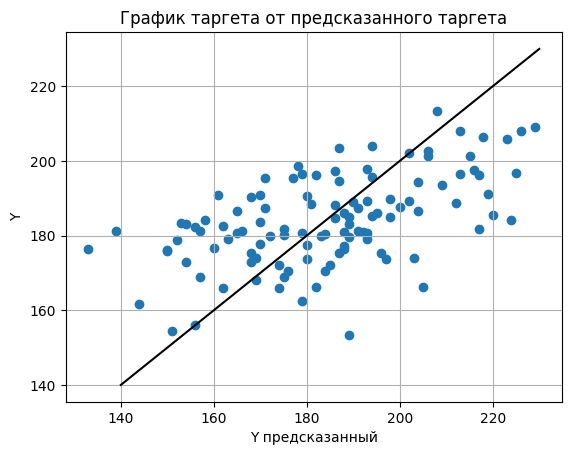

In [ ]:
# Сделаем предсказание на тестовых данных
Y_pred = lr.predict(X_test)
# Для наглядности построим график таргета от предсказанного таргета
plt.scatter(Y_test.values, Y_pred)
plt.plot([140, 230], [140,230], color = 'black')
plt.title('График таргета от предсказанного таргета')
plt.xlabel('Y предсказанный')
plt.ylabel('Y')
plt.grid()

Можно видеть, что наше предсказание не очень хорошо отображают действительность, потому что точки плохо выстраиваются вдоль прямой y = y_pred

[0.25] Now train the Lasso regression model. On a logarithmic scale, search for the optimal value of the regularization coefficient alpha.

In [ ]:
# Дававйте воспользуемся l1 регуляризацией или по-другому - Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Создадим сетку где альфа пробегает по степеням 10 от -2 до 10
grid = {'alpha' : 10.**(np.arange(-4, 11))}
# Передадим в грид серч параметры, кросс валидация будет с 5 фолдами
grid_search = GridSearchCV(Lasso(), grid, cv=5, scoring = 'r2')
# Обучение
grid_search.fit(X_train.values, Y_train.values)
# Лучший альфа по метрикам
print("Best alpha", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.199e+01, tolerance: 8.825e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.390e+01, tolerance: 8.825e+00
  model = cd_fast.enet_coordinate_descent(


Best alpha {'alpha': 0.1}


Альфа = 0.1 - лучшее значение

[0.25] For each sampled alpha for Lasso, count the number of zero weights in the model and plot its dependence on alpha. How much will we have to lose in prediction quality if we want to get rid of at least half of the features using Lasso?

[0, 0, 1, 3, 9, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

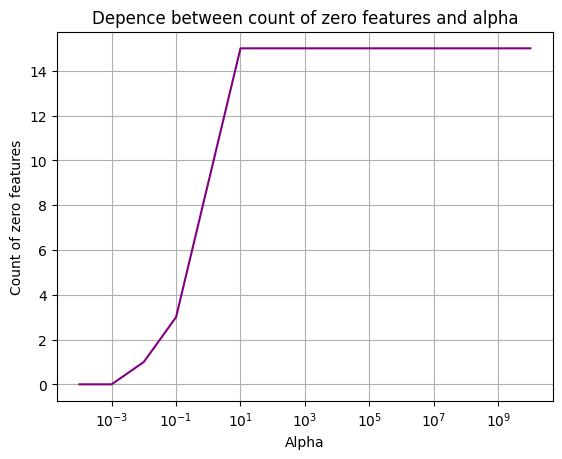

In [ ]:
# Те же альфы
alpha = 10.**(np.arange(-4, 11))
model = Lasso()

# Список количества нулевых коэффициентов для каждого альфы
coefs = []
for a in alpha:
    model.set_params(alpha=a) # передаем параметр альфа
    model.fit(X_train, Y_train)
    coefs.append(len([x for x in model.coef_ if x == 0])) # отбираем только 0

# Рисуем
plt.plot(alpha, coefs, color = 'purple')
plt.xscale('log')
plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Count of zero features')
plt.title('Depence between count of zero features and alpha')
coefs

In [ ]:
# Посчитаем для наилучшего коэффициента R^2
ls = Lasso(alpha = 0.1).fit(X_train, Y_train)
Y_pred = ls.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f'r2 = {r2_score(Y_test, Y_pred)}, mse = {mse}')

r2 = 0.3036423806032199, mse = 308.0702837523533


In [ ]:
# Давайте как в задании узнаем сколько мы еще потеряем если избавимся от
# признаков
# По нашему графику это соответсвует параметру примерно 10 ** 0
ls = Lasso(alpha = 1).fit(X_train, Y_train)
Y_pred = ls.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f'r2 = {r2_score(Y_test, Y_pred)}, mse = {mse}')

r2 = 0.27601246553256387, mse = 320.2938245577859


In [ ]:
# Давайте узнаем какие признаки стали нулевыми
print(X_test.columns)
print(ls.coef_)

Index(['age', 'BMI', 'TG', 'DM_1', 'APOE_2', 'APOE_3', 'APOE_4', 'APOE_5',
       'APOE_6', 'rs174548_1', 'rs174548_2', 'rs4775041_1', 'rs4775041_2',
       'HTN_1', 'chd_1'],
      dtype='object')
[ 0.          2.10975849  0.          3.78162331 -6.4257717  -0.
 -0.          5.28885173  0.          2.52047775  0.          0.
 -0.          0.         10.95579846]


Ответ:

В качестве потеряли меньше 3 сотых. Думаю можно сказать, что это немного. Если посмотреть на коэффициенты, то видно, что Lasso занулило 'age' и 'TG', которые имели невысокую корреляцию с таргетом. Таким образом, можно обьяснить это тем, что они были слабозависимы с таргетной переменной, поэтому, выбросив их из нашей модели, модель не потеряла много в качестве. Также в качестве нулей у нас некоторые категориальные признаки, отвечающие за сайты генов, однако колонки, отвечающие за присутствие у пациента диабета или ишемии сердца сильно влияет на нашу модель (особенно 'chd_1', у которой вес 10.95579846)

[0.5] Train and optimize hyperparameters for Elastic Net, Ridge, SVM and KNN.

In [ ]:
# Провернем тоже самое с Elastic Net, Ridge, SVM и KNN
from sklearn.linear_model import  Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Начнем с Ridge
grid = {'alpha' : 10.**(np.arange(-4, 101))}
grid_search = GridSearchCV(Ridge(), grid, cv=5, scoring='r2')
grid_search.fit(X_train.values, Y_train.values)
print("Best alpha", grid_search.best_params_)

Best alpha {'alpha': 10.0}


In [ ]:
# Теперь ElasticNet
grid = {'alpha' : 10.**(np.arange(-4, 101))}
grid_search = GridSearchCV(ElasticNet(), grid, cv=5, scoring = 'r2')
grid_search.fit(X_train.values, Y_train.values)
print("Best alpha", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.712e+04, tolerance: 8.825e+00
  model = cd_fast.enet_coordinate_descent(


Best alpha {'alpha': 0.1}


In [ ]:
# SVM, здесь будет два параметра: С и ядро
grid = {'C' : 10.**(np.arange(0, 5)), 'kernel' : ['linear', 'poly', 'rbf']}
grid_search = GridSearchCV(SVR(), grid, cv=5, scoring = 'r2')
grid_search.fit(X_train.values, Y_train.values)
print("Best params", grid_search.best_params_)

Best params {'C': 1.0, 'kernel': 'linear'}


In [ ]:
# KNN, здесь гиперпараметр это количество соседей, оценка расстояние и метрика
grid = {
    'n_neighbors': list(range(2, 10)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}
grid_search = GridSearchCV(KNeighborsRegressor(), grid, cv=5, scoring = 'r2')
grid_search.fit(X_train.values, Y_train.values)
print("Best params", grid_search.best_params_)

Best params {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


[0.25] Justify the parameters grid for each model. What number of cross-validation folds did you use? Why?

Число кросс-валидации я использовал 5, так как 5 и 10 это стандартные числа для использования.
Почему лучшими параметрами оказались такие - обьяснить трудно

[0.85] Use test set to rank optimized models. Describe and interpret results.

In [ ]:
# Давайте оценим между собой все модели с их наилучшими гиперпараметрами

models = {'OLS' : LinearRegression(),
          'Lasso' : Lasso(alpha = 0.1),
          'Ridge' : Ridge(alpha = 10),
          'ElasticNet' : ElasticNet(alpha = 0.1),
          'SVM' : SVR(C = 1, kernel = 'poly'),
          'KNN' : KNeighborsRegressor(metric = 'manhattan', n_neighbors = 9,
                                      weights = 'uniform')}

for name, model in models.items():
  mdl_f = model.fit(X_train, Y_train)
  mse = mean_squared_error(Y_test, mdl_f.predict(X_test))
  print(f'{name} : r2 = {r2_score(Y_test, mdl_f.predict(X_test))}, mse = {mse}')

OLS : r2 = 0.3034225686788079, mse = 308.1675290757899
Lasso : r2 = 0.3036423806032199, mse = 308.0702837523533
Ridge : r2 = 0.29743659864932526, mse = 310.8157365975418
ElasticNet : r2 = 0.292884648135606, mse = 312.829530440428
SVM : r2 = 0.197688121927317, mse = 354.9447023353384
KNN : r2 = 0.22707610542934997, mse = 341.9433878322768


Достаточно нетривиальные результаты: наилучшей моделю в нашем случае оказывается
Lasso, которое незначительно опережает другие линейные модели, наихудшей моделью оказалась SVR, что обидно, так как ожидалось, что она будет показывать наилучший результат. Можно предположить, что Lasso показывает результат лучше других моделей, так как некоторые признаки только ухудшают качество модели, и исключение их пойдет только на пользу. То, что SVR показала результаты хуже, может говорить о том, что в сетке гиперпараметров мы не задали наиболее эффективные их значения, а так же мы не стали дальше исключать выбросы ниже 99ого процентиля, а SVR очень чувствительна к выбросам.

[0.85] Perform a feature importance analysis for all models (where applicable), interpret the results, and make appropriate comparisons.

In [ ]:
# Рассмотрим влияние признаков в моделях (кроме KNN)
print(X_train.columns)
models = {'OLS' : LinearRegression(),
          'Lasso' : Lasso(alpha = 0.1),
          'Ridge' : Ridge(alpha = 10),
          'ElasticNet' : ElasticNet(alpha = 0.1),
          'SVM' : SVR(C = 1, kernel = 'linear')}

for name, model in models.items():
  mdl_f = model.fit(X_train, Y_train)
  print(f'{name} : {mdl_f.coef_}')

Index(['age', 'BMI', 'TG', 'DM_1', 'APOE_2', 'APOE_3', 'APOE_4', 'APOE_5',
       'APOE_6', 'rs174548_1', 'rs174548_2', 'rs4775041_1', 'rs4775041_2',
       'HTN_1', 'chd_1'],
      dtype='object')
OLS : [ 0.65054891  2.01417626  0.58402409  8.17745572 -4.67702652  6.24767728
  8.67216448 19.82434386 16.20514149  7.77706608  2.79085828  2.3459469
 -2.32800541 -0.58998132 13.00742287]
Lasso : [  0.31205203   1.92490798   0.84374996   7.96816968 -12.82479914
  -0.          -0.          10.40546081   3.72682868   6.87718074
   0.23931217   1.91649079  -0.6567422    0.          12.70478679]
Ridge : [  0.60833514   2.17079261   0.44395992   7.03960299 -10.70652648
  -0.48449257  -0.16394146   9.17662076   3.12638283   6.3638591
   1.29233407   1.74623086  -1.21713029   0.2936733   11.5558986 ]
ElasticNet : [ 0.5593279   2.21464203  0.39432583  6.58805891 -9.73829574 -0.
 -0.          8.62388716  2.06305348  5.81904648  0.56786461  1.46223768
 -0.61092836  0.28886676 11.085478  ]
SVM : [[  0

Коэффициенты в моделях имеют разные значения, и порой разные знаки, особенно отличается от остальных SVR (она показала наихудший результат). Линейные модели показывают, относительно, очень схожий результат.


[0.85] Answer the following questions:

* Which model works the best with cholesterol data? Explain, what could be the reason for it.
* Based on your analysis above, have you found expected/unexpected important features? Is the connection with cholesterol level seems logical?
* Would you suggest to use that model to a doctor or use it in a real study?

Ответ:

Давайте просуммируем все выше сказанное и повторимся.

- Наилучшей моделю в нашем случае оказывается
Lasso, которое незначительно опережает другие линейные модели, это может быть связано с тем, что Lasso показывает результат лучше других моделей, так как некоторые признаки только ухудшают качество модели, и исключение их пойдет только на пользу.

- Никаких неожиданностей в важности признаков не было обнаружено. Как и предполагалось, пациенты с диагностированным диабетом или ишемиий сердца имели более высокий уровень холестерина. Также и с высоким индексом массы тела.

- Я бы не посоветовал использовать свою модель врачу или в исследовании, потому что, всё-таки, метрики показывают не очень хороший результат, а интерпретация анализа не дает ничего того, что врачи бы не знали.

# Extra points [2.0]

[0.5 + 1.0] Implement stochastic gradient descent for linear regression from scrath. Make it in a form of python function!

[0.5] If you make it as simple as the one-feature model we looked at in the class, [1.0] for implementation that works with whole cholesterol dataset.

In [ ]:
# Давайте попробуем реализовать функцию стохастического градиентного спуска
# в качестве аргументов возьмем дата фрейм признаков, серию таргета, learning
# rate, который отвечает за вес антиградиента, количество эпох(сколько итераций)
# и размер бача (размер подвыборки)
def stochastic_gradient_descent(X, y, learning_rate=0.01, num_epochs=1000, batch_size=1):
    n_samples, n_features = X.shape # число данных и количество признаков
    w = np.zeros(n_features) # веса
    b = 0 # баес (свободный член)

    for epoch in range(num_epochs): # итерируемся по эпохам
        indices = np.random.permutation(n_samples) # перемешаем данные
        # другими словами используем бутстреп
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, n_samples, batch_size):
            # Берем подвыборки
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            y_pred = np.dot(X_batch, w) + b # считаем линейную регрессию
            # вычисляем по формулам градиент для весов и баес
            grad_w = np.dot(X_batch.T, y_pred - y_batch) / batch_size
            grad_b = np.mean(y_pred - y_batch)

            # Обновляем параметры
            w -= learning_rate * grad_w
            b -= learning_rate * grad_b

    return w, b # возвращаем параметры



[0.5] Use any implementation of SGD to calculate MSE at each step. Make a plot that represents how MSE changes with each step. What learning rate and batch size works best for you?

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ